# B7. Normal distributions

## About

> In this chapter, you will ... find probabilities and quantiles for normal distributions and briefly investigate some properties of normal distributions.

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Computer activity 1

> In Unit 6, a normal distribution with mean 40 and standard deviation 2 was used to model the variation in the chest measurements (in inches) of Scottish soldiers in the nineteenth century.
In this activity, you will ... calculate several probabilities for this distribution.

In [2]:
# declare the distribution
soldiers = norm(loc=40, scale=2)

### (a)

Calculate the proportion of Scottish soldiers who, according to this model, had chests measuring between 37 and 42 inches inclusive.

In [3]:
# F(42) - F(37)
round(soldiers.cdf(x=42) - soldiers.cdf(x=37), 6)

0.774538

### (b)

According to this model, what proportion of Scottish soldiers had chest measurements greater than 43 inches?

We can solve this either using $1-F(43)$ or by using the method `sf(x)`, which returns $1-F(x)$.

In [4]:
round(1 - soldiers.cdf(x=43), 4)

0.0668

In [5]:
round(soldiers.sf(x=43), 4)

0.0668

### (c)

According to this model, below what value were the chest measurements of only 2.5% of Scottish soldiers?

In [6]:
round(soldiers.ppf(q=0.025), 1)

36.1

### (d)

What chest measurement was exceeded by only 5% of Scottish soldiers according to this model?

In [7]:
round(soldiers.ppf(q=0.95), 1)

43.3

## Computer activity 2

> In Activities 6 and 7 of Unit 6, a normal distribution with mean 0 and variance 2.75 was used to model angular measurement errors made during the mapping of the state of Massachusetts in the USA in the nineteenth century.
> In this activity you should find the probabilities and quantiles discussed in those activities as listed below.
> (Round the value for the standard deviation that you use to three decimal places.)

In [8]:
# declar the distribution
angular = norm(loc=0, scale=round(2.75**0.5, 3))

### (a)

Find the probability that an error is positive and greater than 0.5 minutes of arc.

In [9]:
round(angular.sf(x=0.5), 4)

0.3815

(b)

What is the probability that an error is positive but less than two minutes of arc?

In [10]:
# nore that as mu=0, then the P(X<0) = 0.5
round(angular.cdf(x=2) - 0.5, 4)

0.3861

(c) Obtain the probability that the size of an error, which may be positive or negative, is less than 1 minute of arc.

In [11]:
# P(X<-1) or P(X>1) = 2 * P(X<-1)
round(2*angular.cdf(x=-1), 4)

0.5464

### (d)

What is the probability that the size of an error, positive or negative, is greater than 1.5 minutes of arc?

In [12]:
# P(X<-1.5) or P(X>1.5) = 2 * P(X<-1.5)
round(2*angular.cdf(x=-1.5), 4)

0.3656

(e) Suppose that 10% of errors are positive and greater than $x$.
Find the value of $x$.

In [13]:
round(angular.ppf(q=0.9), 4)

2.1248

(f) Suppose that 95% of errors lie between $−b$ and $b$ (where $b$ is positive).
Find the value of $b$.

In [14]:
round(angular.ppf(q=0.975), 4)

3.2496

(g) Suppose that 99% of errors lie between −$c$ and $c$ (where $c$ is positive).
Find the value of $c$.

In [15]:
round(angular.ppf(q=0.995), 4)

4.2707

## Computer activity 3

> Suppose that the variation in the heights (in centimetres) of elderly women may be adequately modelled by a normal distribution with mean 160 and standard deviation 6.

In [16]:
heights = norm(loc=160, scale=6)

### (a)

According to the model, what proportion of elderly women are taller
than 166 cm?

In [17]:
round(heights.sf(x=166), 4)

0.1587

### (b)

Find the probability that the height of a randomly selected woman will be between 145 cm and 157 cm.

Below what value are the heights of 85% of elderly women?

In [18]:
round(heights.cdf(x=157) - heights.cdf(x=145), 4)

0.3023

In [19]:
round(heights.ppf(q=0.85), 2)

166.22

### (c)

Find the interquartile range of the heights of the population of elderly women.

In [20]:
round(heights.ppf(q=0.75) - heights.ppf(q=0.25), 4)

8.0939

### Additional activity

Activities 4-6 will not be completed in this notebook.
Instead, we will show to draw a graph with shaded regions, using the probabilities calculated in CA.3.

The first probability calculated was $P(X>166)$.

In [21]:
x_fill = np.arange(start=166,
                   stop=heights.ppf(q=0.99),
                   step=0.001)

y_fill = heights.pdf(x_fill)

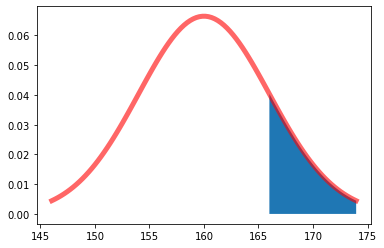

In [22]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(heights.ppf(0.01),
                heights.ppf(0.99), 100)
ax.plot(x, heights.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
plt.fill_between(x_fill, y_fill)
plt.show()

The second probability was $P(145 < X< 157)$

In [23]:
x_fill = np.arange(start=145,
                   stop=157,
                   step=0.001)

y_fill = heights.pdf(x_fill)

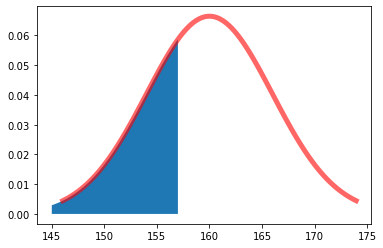

In [24]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(heights.ppf(0.01),
                heights.ppf(0.99), 100)
ax.plot(x, heights.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
plt.fill_between(x_fill, y_fill)
plt.show()

The final probability was the IQR.

In [25]:
x_fill = np.arange(start=heights.ppf(q=0.25),
                   stop=heights.ppf(q=0.75),
                   step=0.001)

y_fill = heights.pdf(x_fill)

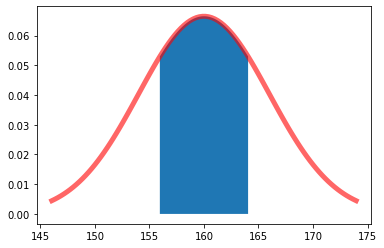

In [26]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(heights.ppf(0.01),
                heights.ppf(0.99), 100)
ax.plot(x, heights.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
plt.fill_between(x_fill, y_fill)
plt.show()